<div class='heading'>
    <div style='float:left;'><h1>CPSC 4300/6300: Applied Data Science</h1></div>
    <img style="float: right; padding-right: 10px; width: 65px" src="https://bsethwalker.github.io/assets/img/clemson_paw.png"> </div>

# Week 4 | Lab : Linear Regression
**Clemson University** **Instructor(s):** Tim Ransom

------------------------------------------------------------------------

## Learning goals

- Define simple linear regression and its assumptions.
- Calculate the coefficients of a simple linear regression model.
- Interpret the R-squared value for a linear regression model.
- Construct a polynomial regression model using Python.
- Evaluate the performance of a multiple linear regression model.

---------------

In [ ]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get("https://bsethwalker.github.io/assets/css/cpsc6300.css").text
HTML(styles)

In [ ]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error
from sklearn.exceptions import NotFittedError

import matplotcheck as mpc
from matplotcheck.base import PlotTester
import matplotcheck.notebook as nb
%matplotlib inline

import warnings

<a class="anchor" id="third-bullet"></a>
## 1 - Simple Linear Regression

Linear regression and its many extensions are a workhorse of the statistics and data science community, both in application and as a reference point for other models. Most of the major concepts in machine learning can be and often are discussed in terms of various linear regression models. Thus, this section will introduce you to building and fitting linear regression models and some of the process behind it, so that you can 1) fit models to data you encounter 2) experiment with different kinds of linear regression and observe their effects 3) see some of the technology that makes regression models work.


### 1.1 Linear regression with a toy dataset
We first examine a toy problem, focusing our efforts on fitting a linear model to a small dataset with three observations.  Each observation consists of one predictor $x_i$ and one response $y_i$ for $i = 1, 2, 3$,

\begin{align*}
(x , y) = \{(x_1, y_1), (x_2, y_2), (x_3, y_3)\}.
\end{align*}

To be very concrete, let's set the values of the predictors and responses.

\begin{equation*}
(x , y) = \{(1, 2), (2, 2), (3, 4)\}
\end{equation*}

There is no line of the form $\beta_0 + \beta_1 x = y$ that passes through all three observations, since the data are not collinear. Thus our aim is to find the line that best fits these observations in the *least-squares sense*, as discussed in lecture.

<div class="exercise"><b>Exercise 1</b></div>

\begin{align*}
(x , y) = \{(x_1, y_1), (x_2, y_2), (x_3, y_3)\}.
\end{align*}

\begin{equation*}
(x , y) = \{(1, 2), (2, 2), (3, 4)\}
\end{equation*}


* Make two numpy arrays out of this data, `x_train` and `y_train`
* Check the dimentions of these arrays
* Try to reshape them into a different shape
* Make points into a very simple scatterplot
  1. To create this plot, you need to set up the Figure and Axes objects using `plt.subplots()`. 
        - These two objects (fig and ax) will allow you to control various properties of the figure and plot.
        - `fig` is the Figure object: It serves as the overall container for the plot.
        - `ax` is the Axes object: This is where the actual data points will be plotted, including x and y axes, labels, etc.
        ```python
            Example code: fig, ax = plt.subplots(figsize=(10, 6))
        ```
  - **Expected output:**
  
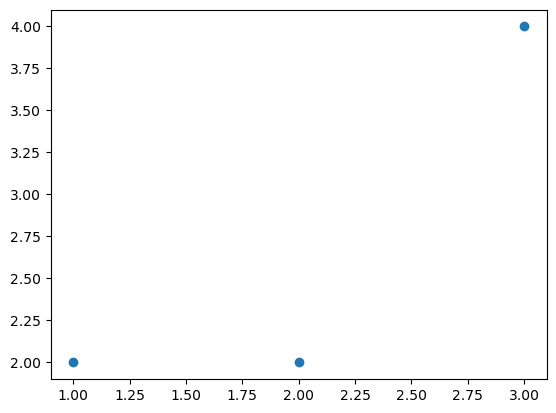

* Make a better scatterplot

  1. To create this scatter plot, you need to set up the Figure and Axes objects using `plt.subplots()`. 
        - These two objects (fig and ax) will allow you to control various properties of the figure and plot.
        - `fig` is the Figure object: It serves as the overall container for the plot.
        - `ax` is the Axes object: This is where the actual data points will be plotted, including x and y axes, labels, etc.
        ```python
            Example code: fig, ax = plt.subplots(figsize=(10, 6))
        ```
  2. Customize the Plot: 
        - You need to set the title of the plot, the labels for the x-axis and y-axis, and format the ticks on the x-axis for better readability.
        
  - **Expected output:**

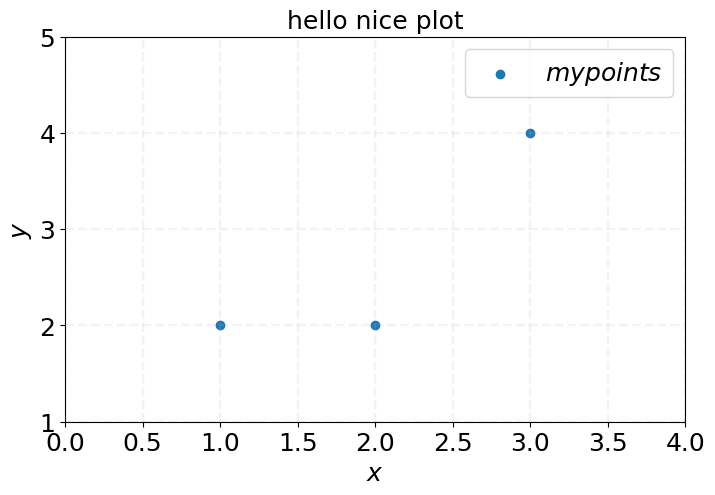

### **Note: Write your code for `exercise 1` in subsequest code cells below marked with instructions using python doc string. Implement only the part of exercise as mentioned in code cells doc-tring.**

In [ ]:
"""Make two numpy arrays out of this data, x_train and y_train"""

# your code here
raise NotImplementedError

In [ ]:
"""Check the dimentions of arrays x_train and y_train"""

# your code here
raise NotImplementedError

In [ ]:
"""Try to reshape x_train and y_train into a different shape"""

# your code here
raise NotImplementedError

In [ ]:
"""Make a simple scatter plot:"""

# your code here
raise NotImplementedError

In [ ]:
# your code here
raise NotImplementedError


### 1.2 Formulae
Linear regression is special among the models we study because it can be solved explicitly. While most other models (and even some advanced versions of linear regression) must be solved itteratively, linear regression has a formula where you can simply plug in the data.

For the single predictor case it is:
$\beta_1 = \frac{\sum_{i=1}^n{(x_i-\bar{x})(y_i-\bar{y})}}{\sum_{i=1^n{(x_i-\bar{x})^2}}\beta_0 = \bar{y} - \beta_1\bar{x}}$
    
Where $\bar{y}$ and $\bar{x}$ are the mean of the y values and the mean of the x values, respectively.

### 1.3 Building a model from scratch
In this part, we will solve the equations for simple linear regression and find the best fit solution to our toy problem.

The snippets of code below implement the linear regression equations on the observed predictors and responses, which we'll call the training data set.  Let's walk through the code.

We have to reshape our arrrays to 2D. We will see later why.

<div class="exercise"><b>Exercise 2</b></div>

* make an array x with shape (2,3)
* reshape it to a size that you want

### **Note: Write your code for `exercise 2` in subsequest code cells below marked with instructions using python doc string. Implement only the part of exercise as mentioned in code cells doc-tring.**

In [ ]:
"""Make an array 'x' of shape (2,3)"""

# your code here
raise NotImplementedError

In [ ]:
"""Reshape array 'x' to a size of your choice."""

# your code here
raise NotImplementedError

In [ ]:
# Reshape to be a proper 2D array
x_train = x_train.reshape(x_train.shape[0], 1)
y_train = y_train.reshape(y_train.shape[0], 1)

print(x_train.shape)

print(x_train)

In [ ]:
# first, compute means
y_bar = np.mean(y_train)
x_bar = np.mean(x_train)

# build the two terms
numerator = np.sum( (x_train - x_bar)*(y_train - y_bar) )
denominator = np.sum((x_train - x_bar)**2)

print(numerator.shape, denominator.shape) #check shapes

* Why the empty brackets? (The numerator and denominator are scalars, as expected.)

In [ ]:
#slope beta1
beta_1 = numerator/denominator

#intercept beta0
beta_0 = y_bar - beta_1*x_bar

print("The best-fit line is {0:3.2f} + {1:3.2f} * x".format(beta_0, beta_1))
print(f'The best fit is {beta_0}')

<div class="exercise"><b>Exercise 3</b></div>

Turn the code from the above cells into a function called `simple_linear_regression_fit`, that inputs the training data and returns `beta0` and `beta1`.

To do this, copy and paste the code from the above cells and adjust below function as needed, so that the training data becomes the input and the betas become the output.

```python
def simple_linear_regression_fit(x_train: np.ndarray, y_train: np.ndarray) -> np.ndarray:
    """
    Inputs:
    x_train: a (num observations by 1) array holding the values of the predictor variable
    y_train: a (num observations by 1) array holding the values of the response variable

    Returns:
    beta_vals:  a (num_features by 1) array holding the intercept and slope coeficients
    """
    return
```

Check your function by calling it with the training data from above and printing out the beta values.

In [ ]:
"""Write your code for Exercise 3 here:"""

# your code here
raise NotImplementedError

* Let's run this function and see the coefficients

In [ ]:
x_train = np.array([1 ,2, 3])
y_train = np.array([2, 2, 4])

betas = simple_linear_regression_fit(x_train, y_train)

beta_0 = betas[0]
beta_1 = betas[1]

print("The best-fit line is {0:8.6f} + {1:8.6f} * x".format(beta_0, beta_1))

<div class="exercise"><b>Exercise 4</b></div>

* Do the values of `beta0` and `beta1` seem reasonable?
* Plot the training x_train = [1, 2, 3] data using a scatter plot.
* Plot the best fit line namely `best_fit` with `beta0` and `beta1` together with the training data.

  1. To create this scatter plot, you need to set up the Figure and Axes objects using `plt.subplots()`. 
        - These two objects (fig and ax) will allow you to control various properties of the figure and plot.
        - `fig` is the Figure object: It serves as the overall container for the plot.
        - `ax` is the Axes object: This is where the actual data points will be plotted, including x and y axes, labels, etc.
        ```python
            Example code: fig, ax = plt.subplots(figsize=(10, 6))
        ```
  2. Customize the Plot: 
        - You need to set the title of the plot, the labels for the x-axis and y-axis, and format the ticks on the x-axis for better readability.

In [ ]:
"""Write your code for Exercise 4 here:"""

# your code here
raise NotImplementedError

Fill in the code cell below with boolean values to answer the questions.

1. Are the values of `beta0` and `beta1` roughly reasonable?
2. Do they capture positive or negative correlation? (Use False for positive correlation and True for negative correlation)

In [ ]:
answer1 = None
answer2 = None

# your code here
raise NotImplementedError

<a class="anchor" id="fourth-bullet"></a>
### 1.4 - Building a model with `statsmodels` and `sklearn`

Now that we can concretely fit the training data from scratch, let's learn two `python` packages to do it all for us:
* [statsmodels](http://www.statsmodels.org/stable/regression.html) and 
* [scikit-learn (sklearn)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Our goal  is to show how to implement simple linear regression with these packages.  For an important sanity check, we compare the $\beta$ values from `statsmodels` and `sklearn` to the $\beta$ values that we found from above with our own implementation.

For the purposes of this lab, `statsmodels` and `sklearn` do the same thing.  More generally though, `statsmodels` tends to be easier for inference \[finding the values of the slope and intercept and dicussing uncertainty in those values\], whereas `sklearn` has machine-learning algorithms and is better for prediction \[guessing y values for a given x value\]. (Note that both packages make the same guesses, it's just a question of which activity they provide more support for.

**Note:** `statsmodels` and `sklearn` are different packages!  Unless we specify otherwise, you can use either one.

Below is the code for `statsmodels`.  `Statsmodels` does not by default include the column of ones in the $X$ matrix, so we include it manually with `sm.add_constant`.

In [ ]:
# create the X matrix by appending a column of ones to x_train
X = sm.add_constant(x_train)

# this is the same matrix as in our scratch problem!
print(X)

# build the OLS model (ordinary least squares) from the training data
toyregr_sm = sm.OLS(y_train, X)

# do the fit and save regression info (parameters, etc) in results_sm
results_sm = toyregr_sm.fit()

# pull the beta parameters out from results_sm
beta0_sm = results_sm.params[0]
beta1_sm = results_sm.params[1]

print(f'The regression coef from statsmodels are: beta_0 = {beta0_sm:8.6f} and beta_1 = {beta1_sm:8.6f}')

Besides the beta parameters, `results_sm` contains a ton of other potentially useful information.

In [ ]:
warnings.filterwarnings('ignore')
print(results_sm.summary())

Now let's turn our attention to the `sklearn` library and walk through some of the code:

### 1.5 build the least squares model
toyregr = linear_model.LinearRegression()

### 1.6 save regression info (parameters, etc) in results_skl
results = toyregr.fit(x_train, y_train)

### 1.7 pull the beta parameters out from results_skl
beta0_skl = toyregr.intercept_
beta1_skl = toyregr.coef_[0]

print("The regression coefficients from the sklearn package are: beta_0 = {0:8.6f} and beta_1 = {1:8.6f}".format(beta0_skl, beta1_skl))

### 1.8 The `scikit-learn` library and the shape of things

Before diving into a "real" problem, let's discuss more of the details of `sklearn`.

`Scikit-learn` is the main `Python` machine learning library. It consists of many learners which can learn models from data, as well as a lot of utility functions such as `train_test_split()`. 

Use the following to add the library into your code:

```python
import sklearn 
```

In `scikit-learn`, an **estimator** is a Python object that implements the methods `fit(X, y)` and `predict(T)`

Let's see the structure of `scikit-learn` needed to make these fits. `fit()` always takes two arguments:
```python
estimator.fit(Xtrain, ytrain)
```
We will consider two estimators in this lab: `LinearRegression` and `KNeighborsRegressor`.

It is very important to understand that `Xtrain` must be in the form of a **2x2 array** with each row corresponding to one sample, and each column corresponding to the feature values for that sample.

`ytrain` on the other hand is a simple array of responses.  These are continuous for regression problems.

## 2 - Practice with `sklearn` and a real dataset
We begin by loading up the `mtcars` dataset. This data was extracted from the 1974 Motor Trend US magazine, and comprises of fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models). We will load this data to a dataframe with 32 observations on 11 (numeric) variables. Here is an explanation of the features:

- `mpg` is Miles/(US) gallon 
- `cyl` is Number of cylinders, 
- `disp` is	Displacement (cu.in.), 
- `hp` is	Gross horsepower, 
- `drat` is	Rear axle ratio, 
- `wt` is the Weight (1000 lbs), 
- `qsec` is 1/4 mile time,
- `vs` is Engine (0 = V-shaped, 1 = straight), 
- `am` is Transmission (0 = automatic, 1 = manual), 
- `gear` is the Number of forward gears, 
- `carb` is	Number of carburetors.

In [ ]:
#load mtcars
dfcars = pd.read_csv("data/mtcars.csv")
dfcars.head()

In [ ]:
# Fix the column title ('Unnamed: 0' -> 'car name')
dfcars = dfcars.rename(columns={"Unnamed: 0":"car name"})
dfcars.head()

In [ ]:
dfcars.shape

### 2.1 Searching for values: how many cars have 4 gears?

<div class="exercise"><b>Exercise 2.1</b></div>

   * Find the number of cars that have 4 number of gears and store this value to `gears4_count` variable.

In [ ]:
"""Your code for exercise 2.1 here:"""

# your code here
raise NotImplementedError

Next, let's split the dataset into a training set and test set.

In [ ]:
#set random_state to get the same split every time
traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

In [ ]:
# testing set is around 20% of the total data; training set is around 80%
print("Shape of full dataset is: {0}".format(dfcars.shape))
print("Shape of training dataset is: {0}".format(traindf.shape))
print("Shape of test dataset is: {0}".format(testdf.shape))

Now we have training and test data.  We still need to select a predictor and a response from this dataset.  Keep in mind that we need to choose the predictor and response from both the training and test set.  You will do this in the exercises below.  However, we provide some starter code for you to get things going.

In [ ]:
traindf.head()

In [ ]:
# Extract the response variable that we're interested in
y_train = traindf.mpg
y_train

Now, notice the shape of `y_train`.

In [ ]:
y_train.shape, type(y_train)

### 2.2 Array reshape
This is a 1D array as should be the case with the **Y** array.  Remember, `sklearn` requires a 2D array only for the predictor array.  You will have to pay close attention to this in the exercises later. `Sklearn` doesn't care too much about the shape of `y_train`.

The whole reason we went through that whole process was to show you how to reshape your data into the correct format.

**IMPORTANT:** Remember that your response variable `ytrain` can be a vector but your predictor variable `xtrain` ***must*** be an array!

<a class="anchor" id="fifth-bullet"></a>
### 2.3 Simple linear regression with automobile data
We will now use `sklearn` to predict automobile mileage per gallon (mpg) and evaluate these predictions. We already loaded the data and split them into a training set and a test set.

We need to choose the variables that we think will be good predictors for the dependent variable `mpg`. 

<div class="exercise"><b>Exercise 2.2 </b></div>

* Pick one variable to use as a predictor for simple linear regression.  Explain your reasons fo choosing that variable as a predictor.  
* Justify your choice with some visualizations.  
* Is there a second variable you'd like to use? For example, we're not doing multiple linear regression here, but if we were, is there another variable you'd like to include if we were using two predictors?

In [ ]:
"""Your code here for exercise 2.2:"""

# your code here
raise NotImplementedError

<div class="exercise"><b>Exercise 2.3</b></div>

* Use `sklearn` to fit the training data using simple linear regression.
* Use the model to make mpg predictions on the test set.  
* Plot the data and the prediction.  
* Print out the mean squared error for the training set and the test set and compare.

### **Note: Write your code for `Exercise 2.3` in subsequest code cells below marked with instructions using python doc string. Implement only the part of exercise as mentioned in code cells doc-tring.**

In [ ]:
dfcars = pd.read_csv('data/mtcars.csv')
dfcars = dfcars.rename(columns={"Unnamed: 0":"name"})

dfcars.head()

In [ ]:
traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

y_train = np.array(traindf.mpg)
X_train = np.array(traindf.wt)
X_train = X_train.reshape(X_train.shape[0], 1)

In [ ]:
y_test = np.array(testdf.mpg)
X_test = np.array(testdf.wt)
X_test = X_test.reshape(X_test.shape[0], 1)

In [ ]:
# Let's take another look at our data
dfcars.head()

In [ ]:
# And out train and test sets 
y_train.shape, X_train.shape

In [ ]:
y_test.shape, X_test.shape

Instantiate a new `LinearRegression()` object in a variable named `regression`.

In [ ]:
"""Instantiate a new `LinearRegression()` object in a variable named `regression`."""

# your code here
raise NotImplementedError

In [ ]:
"""Use sklearn to fit method on the training data x_train and y_train using linear regression model created above."""
"""Calculate and store R-squared value in 'r2' using score() method on test set X_test and y_test."""

# your code here
raise NotImplementedError

In [ ]:
"""Use the model to make mpg predictions on the test set. Store the predictions in 'predicted_y'."""

# your code here
raise NotImplementedError

In [ ]:
"""Print out the mean squared error for the training set and the test set and compare.""" 
"""Store the values in 'mse_train' and 'mse_test' respectively."""

# your code here
raise NotImplementedError

In [ ]:
print(regression.score(X_train, y_train))
print('Coefficients: \n', regression.coef_[0], regression.intercept_)

**Make a plot showing the *data* and predicted y values from predicted_y for mpg.**

   1. To create this plot, you need to set up the Figure and Axes objects using `plt.subplots()`. 
        - These two objects (fig and ax) will allow you to control various properties of the figure and plot.
        - `fig` is the Figure object: It serves as the overall container for the plot.
        - `ax` is the Axes object: This is where the actual data points will be plotted, including x and y axes, labels, etc.
        ```python
            Example code: fig, ax = plt.subplots(figsize=(10, 6))
        ```
   2. Customize the Plot: 
        - You need to set the title of the plot, the labels for the x-axis and y-axis, and format the ticks on the x-axis for better readability.

In [ ]:
"""Plot the data and the prediction."""
"""Create the plot as per instructions in above cell."""

# your code here
raise NotImplementedError

## 3 - Polynomial Regression, and Cab Data

Polynomial regression uses a **linear model** to estimate a **non-linear function** (i.e., a function with polynomial terms). For example:

$y = \beta_0 + \beta_1x_i + \beta_1x_i^{2}$

It is a linear model because we are still solving a linear equation (the _linear_ aspect refers to the beta coefficients).

In [ ]:
# read in the data, break into train and test
cab_df = pd.read_csv("data/cabs.txt")
train_data, test_data = train_test_split(cab_df, test_size=.2, random_state=42)
cab_df.head()

In [ ]:
cab_df.shape

In [ ]:
# do some data cleaning
X_train = train_data['TimeMin'].values.reshape(-1,1)/60 # transforms it to being hour-based
y_train = train_data['PickupCount'].values

X_test = test_data['TimeMin'].values.reshape(-1,1)/60 # hour-based
y_test = test_data['PickupCount'].values

def plot_cabs(cur_model, poly_transformer=None):
    
    # build the x values for the prediction line
    x_vals = np.arange(0,24,.1).reshape(-1,1)
    
    # optionally use the passed-in transformer
    if poly_transformer != None:
        dm = poly_transformer.fit_transform(x_vals)
    else:
        dm = x_vals
        
    # make the prediction at each x value
    prediction = cur_model.predict(dm)
    
    # plot the prediction line, and the test data
    plt.plot(x_vals,prediction, color='k', label="Prediction")
    plt.scatter(X_test, y_test, label="Test Data")

    # label your plots
    plt.ylabel("Number of Taxi Pickups")
    plt.xlabel("Time of Day (Hours Past Midnight)")
    plt.legend()
    plt.show()

In [ ]:
fitted_cab_model0 = LinearRegression().fit(X_train, y_train)
plot_cabs(fitted_cab_model0)

In [ ]:
fitted_cab_model0.score(X_test, y_test)

<div class="exercise"><b>Exercise 3.1</b></div>

**Tasks**:
1. The above code uses `sklearn`. As more practice, and to help you stay versed in both libraries, perform the same task (fit a linear regression line) using `statsmodels` and report the $r^2$ score. 
2. Is it the same value as what sklearn reports, and is this the expected behavior?
3. Perform the same task (fit a linear regression line) using statsmodels.
4. Instantiate a new `OLS()` object using statsmodels.regression.linear_model in a variable named `OLSModel` and then fit the training data.
5. Generate predections using fitted model and store this in `ols_predicted_pickups_test`
6. Report the $r^2$ score on test set.
7. Store this $r^2$ value in `r2_score_test`.

In [ ]:
# augment the data with a column vector of 1's to account for the intercept in the regression model.
train_data_augmented = sm.add_constant(X_train) # adding a constant for the intercept
test_data_augmented = sm.add_constant(X_test) # adding a constant for the intercept

- Instantiate a new `OLS()` object using statsmodels.regression.linear_model in a variable named `OLSModel` and then fit the training data.

In [ ]:
"""Write your code for exercise 3.1 here:"""

# your code here
raise NotImplementedError

We can see that there's still a lot of variation in cab pickups that's not being captured by a linear fit. Further, the linear fit is predicting massively more pickups at 11:59pm than at 12:00am. This is a bad property, and it's the conseqeuence of having a straight line with a non-zero slope. However, we can add columns to our data for $TimeMin^2$ and $TimeMin^3$ and so on, allowing a curvy polynomial line to hopefully fit the data better.

We'll be using ``sklearn``'s `PolynomialFeatures()` function to take some of the tedium out of building the expanded input data. In fact, if all we want is a formula like $y \approx \beta_0 + \beta_1 x + \beta_2 x^2 + ...$, it will directly return a new copy of the data in this format!

In [ ]:
transformer_3 = PolynomialFeatures(3, include_bias=False)
expanded_train = transformer_3.fit_transform(X_train) # TRANSFORMS it to polynomial features
pd.DataFrame(expanded_train).describe() # notice that the columns now contain x, x^2, x^3 values

A few notes on `PolynomialFeatures`:

- The interface is a bit strange. `PolynomialFeatures` is a _'transformer'_ in sklearn. We'll be using several transformers that learn a transformation on the training data, and then we will apply those transformations on future data. With PolynomialFeatures, the `.fit()` is pretty trivial, and we often fit and transform in one command, as seen above with ``.fit_transform()`.
- You rarely want to `include_bias` (a column of all 1's), since _**sklearn**_ will add it automatically. Remember, when using _**statsmodels,**_ you can just `.add_constant()` right before you fit the data.
- If you want polynomial features for a several different variables (i.e., multinomial regression), you should call `.fit_transform()` separately on each column and append all the results to a copy of the data (unless you also want interaction terms between the newly-created features). See `np.concatenate()` for joining arrays.

In [ ]:
fitted_cab_model3 = LinearRegression().fit(expanded_train, y_train)
print("fitting expanded_train:", expanded_train)
plot_cabs(fitted_cab_model3, transformer_3)

<div class="exercise"><b>Exercise 3.2</b></div>

**Questions**:
1. Calculate the polynomial model's $R^2$ performance on the test set and store in variable named `r2_score_poly`. 
2. Does the polynomial model improve on the purely linear model?
3. Make a residual plot for the polynomial model. What does this plot tell us about the model?

##### NOTE 1: unlike `statsmodels` `r2_score()` function, sklearn has a .score() function
##### NOTE 2: `fit_transform()` is a nifty function that transforms the data, then fits it

In [ ]:
"""Calculate the polynomial model's $R^2$ performance on the test set and store in variable named `r2_score_poly`"""

# your code here
raise NotImplementedError

Does adding polynomial terms to a model always improve its performance? 
1. Yes, because higher-degree polynomials always reduce training error.
2. No, because higher-degree polynomials can lead to overfitting.
3. No, because adding polynomial terms may increase multicollinearity, leading to unstable estimates.
4. Yes, because polynomial regression always generalizes better than linear regression.

Select all that apply by assigning an array of corresponding integers to a variable called `answer`

In [ ]:
"""Select all that apply by assigning an array of corresponding integers to a variable called answer"""

# your code here
raise NotImplementedError

In [ ]:
"""Make a residual plot for the polynomial model. """

# your code here
raise NotImplementedError

#### Other features
Polynomial features are not the only constucted features that help fit the data. Because these data have a 24 hour cycle, we may want to build features that follow such a cycle. For example, $sin(24\frac{x}{2\pi})$, $sin(12\frac{x}{2\pi})$, $sin(8\frac{x}{2\pi})$. Other feature transformations are appropriate to other types of data. For instance certain feature transformations have been developed for geographical data.

### 3.1 Scaling Features
When using polynomials, we are explicitly trying to use the higher-order values for a given feature. However, sometimes these polynomial features can take on values that are drastically large, making it difficult for the system to learn an appropriate bias weight due to its large values and potentially large variance. To counter this, sometimes one may be interested in scaling the values for a given feature.

For our ongoing taxi-pickup example, using polynomial features improved our model. If we wished to scale the features, we could use `sklearn`'s StandardScaler() function:

In [ ]:
# SCALES THE EXPANDED/POLY TRANSFORMED DATA
# we don't need to convert to a pandas dataframe, but it can be useful for scaling select columns
train_copy = pd.DataFrame(expanded_train.copy())
test_copy = pd.DataFrame(expanded_test.copy())

# Fit the scaler on the training data
scaler = StandardScaler().fit(train_copy)

# Scale both the test and training data. 
train_scaled = scaler.transform(expanded_train)
test_scaled = scaler.transform(expanded_test)

# we could optionally run a new regression model on this scaled data
fitted_scaled_cab = LinearRegression().fit(train_scaled, y_train)
fitted_scaled_cab.score(test_scaled, y_test)

<hr style="height:3px">

## 4 - Multiple regression and exploring the Football (aka soccer) data
Let's move on to a different dataset! The data imported below were scraped by [Shubham Maurya](https://www.kaggle.com/mauryashubham/linear-regression-to-predict-market-value/data) and record various facts about players in the English Premier League. Our goal will be to fit models that predict the players' market value (what the player could earn when hired by a new team), as estimated by https://www.transfermarkt.us.

`name`: Name of the player  
`club`: Club of the player  
`age` : Age of the player  
`position` : The usual position on the pitch  
`position_cat` :  1 for attackers, 2 for midfielders, 3 for defenders, 4 for goalkeepers  
`market_value` : As on www.transfermarkt.us.on July 20th, 2017  
`page_views` : Average daily Wikipedia page views from September 1, 2016 to May 1, 2017  
`fpl_value` : Value in Fantasy Premier League as on July 20th, 2017  
`fpl_sel` : % of FPL players who have selected that player in their team  
`fpl_points` : FPL points accumulated over the previous season  
`region`: 1 for England, 2 for EU, 3 for Americas, 4 for Rest of World  
`nationality`: Player's nationality  
`new_foreign`: Whether a new signing from a different league, for 2017/18 (till 20th July)  
`age_cat`: a categorical version of the Age feature  
`club_id`: a numerical version of the Club feature  
`big_club`: Whether one of the Top 6 clubs  
`new_signing`: Whether a new signing for 2017/18 (till 20th July)  

As always, we first import, verify, split, and explore the data.

### 4.1 Import and verification and grouping

In [ ]:
league_df = pd.read_csv("data/league_data.txt")
print(league_df.dtypes)

# QUESTION: what would you guess is the mean age? mean salary?
league_df.head() # turns out, it's a lot

In [ ]:
league_df.shape

In [ ]:
league_df.describe()

### 4.2 (Stratified) train/test split

- We want to make sure that the training and test data have appropriate representation of each region; it would be bad for the training data to entirely miss a region. 
- This is especially important because some regions are rather rare.

Refer to this [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for more information:

<div class="exercise"><b>Exercise 4.1</b></div>

**Questions**:
1. Use the `train_test_split()` function to split data into training data and test data respectively, while:
    - (a) ensuring the test size is 20% of the data, and; 
    - (b) using 'stratify' argument to split the data (look up documentation online), keeping equal representation of each region. This doesn't work by default, correct? What is the issue?
    - Store training data to `train_data` and testing data to `test_data`.
2. Deal with the issue you encountered above. Hint: you may find numpy's `.isnan()` and panda's `.dropna()` functions useful!
3. How did you deal with the error generated by `train_test_split`? How did you justify your action? 

In [ ]:
"""Write your code for exercise 4.1 here."""

# your code here
raise NotImplementedError

In [ ]:
train_data.shape, test_data.shape

Now that we won't be peeking at the test set, let's explore and look for patterns! We'll introduce a number of useful pandas and numpy functions along the way. 

### 4.3 Groupby
Pandas' `.groupby()` function is a wonderful tool for data analysis. It allows us to analyze each of several subgroups.

Many times, `.groupby()` is combined with `.agg()` to get a summary statistic for each subgroup. For instance: What is the average market value, median page views, and maximum fpl for each player position?

In [ ]:
train_data.groupby('position').agg({
    'market_value': np.mean,
    'page_views': np.median,
    'fpl_points': np.max
})

In [ ]:
train_data.position.unique()

In [ ]:
train_data.groupby(['big_club', 'position']).agg({
    'market_value': np.mean,
    'page_views': np.mean,
    'fpl_points': np.mean
})

<div class="exercise"><b>Exercise 4.2</b></div>

- Notice that the `.groupby()` function above takes a list of two column names. 

**Reflection Question**:

- Does the order matter? 
- What happens if we switch the two so that 'position' is listed before 'big_club'?

#### Try your code in below code block by switching the order in .groupby() function

In [ ]:
"""Write your code for exercise 4.2 here."""
"""Try your code here by switching the order in .groupby() function"""

# your code here
raise NotImplementedError

<hr style="height:3px">

### 4.4 Linear regression on the football data
This section of the lab focuses on fitting a model to the football (soccer) data and interpreting the model results. The model we'll use is

$$\text{market_value} \approx \beta_0 + \beta_1\text{fpl_points} + \beta_2\text{age} + \beta_3\text{age}^2 + \beta_4log_2\left(\text{page_views}\right) + \beta_5\text{new_signing} +\beta_6\text{big_club} + \beta_7\text{position_cat}$$

We're including a 2nd degree polynomial in age because we expect pay to increase as a player gains experience, but then decrease as they continue aging. We're taking the log of page views because they have such a large, skewed range and the transformed variable will have fewer outliers that could bias the line. We choose the base of the log to be 2 just to make interpretation cleaner.

<div class="exercise"><b>Exercise 4.3</b></div>

**Questions**:
1. Build the data and fit this model to it. How good is the overall model?
2. Interpret the regression model. What is the meaning of the coefficient for:
    - age and age$^2$
    - $log_2($page_views$)$
    - big_club
3. What should a player do in order to improve their market value? How many page views should a player go get to increase their market value by 10?

### **Note: Write your code for `Exercise 4.3` in subsequest code cells below marked with instructions using python doc string. Implement only the part of exercise as mentioned in code cells doc-tring.**

In [ ]:
# we'll do most of it for you ...
y_train = train_data['market_value']
y_test = test_data['market_value']
def build_football_data(df):
    x_matrix = df[['fpl_points','age','new_signing','big_club','position_cat']].copy()
    x_matrix['log_views'] = np.log2(df['page_views'])
    
    # CREATES THE AGE SQUARED COLUMN
    x_matrix['age_squared'] = df['age']**2
    
    # OPTIONALLY WRITE CODE to adjust the ordering of the columns, just so that it corresponds with the equation above
    x_matrix = x_matrix[['fpl_points','age','age_squared','log_views','new_signing','big_club','position_cat']]
    
    # add a constant
    x_matrix = sm.add_constant(x_matrix)
    
    return x_matrix

In [ ]:
"""Question 1 - Build the data and fit this model to it. Use model name - 'model_ex43' for this exercise."""
"""Use build_football_data() to transform both the train_data and test_data and store it to 
train_transformed and test_transformed respectively."""

# your code here
raise NotImplementedError

In [ ]:
"""Question 2 - How good is the overall model?"""
"""Generate predictions for the test set and store it to variable test_predictions."""
"""WRITE CODE TO RUN r2_score()."""
# your code here
raise NotImplementedError

In [ ]:
# let's use the age coefficients to show the effect of age has on one's market value;
# we can get the age and age^2 coefficients via:
agecoef = model_ex43.params.age
age2coef = model_ex43.params.age_squared

# let's set our x-axis (corresponding to age) to be a wide range from -100 to 100, 
# just to see a grand picture of the function
x_vals = np.linspace(-100,100,1000)
y_vals = agecoef*x_vals +age2coef*x_vals**2

# CODE TO PLOT x_vals vs y_vals
plt.plot(x_vals, y_vals)
plt.title("Effect of Age")
plt.xlabel("Age")
plt.ylabel("Contribution to Predicted Market Value")
plt.show()

# Q2A: WHAT HAPPENS IF WE USED ONLY AGE (not AGE^2) in our model (what's the r2?); make the same plot of age vs market value
# Q2B: WHAT HAPPENS IF WE USED ONLY AGE^2 (not age) in our model (what's the r2?); make the same plot of age^2 vs market value
# Q2C: PLOT page views vs market value

# SOLUTION
page_view_coef = model_ex43.params.log_views
x_vals = np.linspace(0,15)
y_vals = page_view_coef*x_vals
plt.plot(x_vals, y_vals)
plt.title("Effect of Page Views")
plt.xlabel("Page Views")
plt.ylabel("Contribution to Predicted Market Value")
plt.show()

# 3- Linear regression on non-experimental data can't determine causation, so we can't prove that
# a given relationship runs in the direction we might think. For instance, doing whatever it
# takes to get more page views probably doesn't meaningfully increase market value; it's likely
# the causation runs in the other direction and great players get more views. Even so, we can use
# page views to help us tell who is a great player and thus likely to be paid well.

<hr style='height:3px'>

### 4.5 Turning Categorical Variables into multiple binary variables
Of course, we have an error in how we've included player position. Even though the variable is numeric (1,2,3,4) and the model runs without issue, the value we're getting back is garbage. The interpretation, such as it is, is that there is an equal effect of moving from position category 1 to 2, from 2 to 3, and from 3 to 4, and that this effect is probably between -0.5 to -1 (depending on your run).

In reality, we don't expect moving from one position category to another to be equivalent, nor for a move from category 1 to category 3 to be twice as important as a move from category 1 to category 2. We need to introduce better features to model this variable.

We'll use `pd.get_dummies` to do the work for us.

In [ ]:
train_design_recoded = pd.get_dummies(train_transformed, columns=['position_cat'], drop_first=True)
test_design_recoded = pd.get_dummies(test_transformed, columns=['position_cat'], drop_first=True)

train_design_recoded.head()

We've removed the original `position_cat` column and created three new ones.

#### Why only three new columns?
Why does pandas give us the option to drop the first category? 

<div class="exercise"><b>Exercise 4.4</b></div>

**Questions**:
1. If we're fitting a model without a constant, should we have three dummy columns or four dummy columns?
2. Fit a model on the new, recoded data, then interpret the coefficient of `position_cat_2`.
3. Store your predictions from model_ex44 to variable named `model_ex44_predictions`
4. Use model name - `model_ex44` for this exercise. Store r2_score in `r2_ex44`.


In [ ]:
"""Fit a model on the new, recoded data, then interpret the coefficient of position_cat_2."""
"""Use model name - 'model_ex44' for this exercise. Store r2_score in 'r2_ex44'."""

# your code here
raise NotImplementedError

**SOLUTION:**
1. If our model does not have a constant, we must include all four dummy variable columns. If we drop one, we're not modeling any effect of being in that category, and effectively assuming the dropped category's effect is 0.
2. Being in position 2 (instead of position 1) has an impact between -1.54 and +2.38 on a player's market value. Since we're using an intercept, the dropped category becomes the baseline and the effect of any dummy variable is the effect of being in that category instead of the baseline category.

# END